<a href="https://colab.research.google.com/github/Ayushp0509/Water-Quality-Prediction-Ml-Project/blob/main/Water_Quality_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   Water Quality Prediction Machine Learning Project



##### **Project Type**    - Supervised Machine Learning Project
##### **Contribution**    - Individual
##### **Name -**             Ayush Patel


# **Project Summary -**

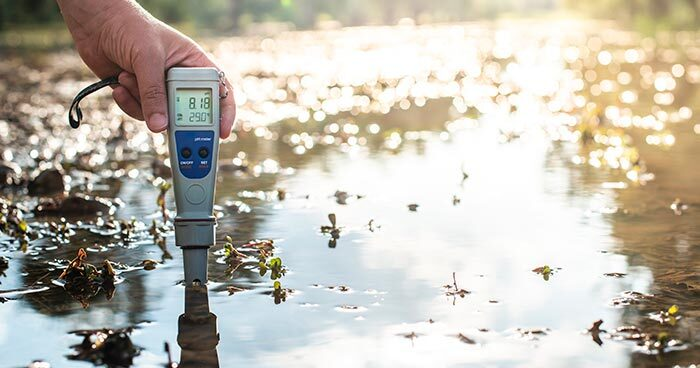


Our project focuses on predicting water potability using machine learning. Leveraging historical data, we aim to develop models that accurately forecast whether water is suitable for drinking. Through rigorous analysis, model training, and evaluation, we aim to deploy reliable prediction systems to ensure safe and potable water for consumption, contributing to public health and environmental well-being.






# **About the Dataset -**

[The Water potability](https://drive.google.com/file/d/1ypGrF8Gjj2DzqPvoebBH1C5USFC1DtIw/view?usp=drive_link) file contains water quality metrics for 3276 different water bodies.

1. pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# **Problem Statement**


Water quality is a critical concern for public health, as access to safe drinking water is essential for human well-being. The goal of this project is to develop a machine learning model capable of accurately predicting water potability based on various water quality parameters. Using a dataset containing measurements of pH value, hardness, total dissolved solids (TDS), chloramines, sulfate, conductivity, organic carbon, trihalomethanes, turbidity, and the potability label, the objective is to build a predictive model that can classify water bodies as either potable (safe for human consumption) or non-potable.

The model will be trained on historical data collected from different water bodies, taking into account variations in water quality metrics. The project aims to address the following key objectives:

the project aims to contribute to the development of a reliable and efficient system for assessing water quality and ensuring access to safe drinking water for communities.






# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')



### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science/Water Quality project/water_potability.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(df.shape)

In [ ]:
print(df.columns)

### Dataset Information

In [ ]:
df.describe()


In [ ]:
# Dataset Info
df.info()

In [ ]:
print(df.nunique())

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

Based on the Above Analysis, the dataset contains 3276 rows and 10 columns.

Three columns, namely pH, sulfate, and Trihalomethanes, have null values present.
The datatype of the 'potability' column is integer, while the remaining six columns have float datatype.

##***Feature Engineering & Data Pre-processing***

In [ ]:
#Checking Correlation between matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [ ]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]


In [ ]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()


In [ ]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

In [ ]:
# Visualizing dataset and also checking for outliers

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)


In [ ]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

In [ ]:
sns.pairplot(df, hue="Potability")

In [ ]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

In [ ]:
fig = px.scatter (df, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()

In [ ]:
fig = px.scatter (df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()

In [ ]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
X.shape, y.shape

In [ ]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X

In [ ]:
# import train-test split
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##***Using Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [ ]:
# Training Model
model_lg.fit(X_train, y_train)

In [ ]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

In [ ]:
print(classification_report(y_test,pred_lg))

In [ ]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

#***Using Decision Tree Classifier***


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [ ]:
# Training Model
model_dt.fit(X_train,y_train)

In [ ]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [ ]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

In [ ]:
print(classification_report(y_test,pred_dt))

In [ ]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#***Using Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

In [ ]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [ ]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

In [ ]:
print(classification_report(y_test,pred_rf))

In [ ]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

#***Using XGBoost Classifier***

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# Training Model
model_xgb.fit(X_train, y_train)

In [ ]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

In [ ]:
print(classification_report(y_test,pred_xgb))

In [ ]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

#***Using KNeighbours***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=13, leaf_size=20)

In [ ]:
# Training Model
model_kn.fit(X_train, y_train)

In [ ]:
# Making Prediction
pred_kn = model_kn.predict(X_test)


In [ ]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

In [ ]:
print(classification_report(y_test,pred_kn))

In [ ]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

#***Using SVM***

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [ ]:
model_svm.fit(X_train, y_train)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

In [ ]:
print(classification_report(y_test,pred_kn))

In [ ]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

#***Using AdaBoost Classifier***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [ ]:
model_ada.fit(X_train, y_train)

In [ ]:
# Making Prediction
pred_ada = model_ada.predict(X_test)

In [ ]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

In [ ]:
print(classification_report(y_test,pred_ada))

In [ ]:
# confusion Maxtrix
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

# **Conclusion**

Based on the result of accuracy scores for different machine learning models applied to the project, we can draw the following conclusions:

XGBoost: The XGBoost model achieved the highest accuracy score of approximately 66.54%. XGBoost is known for its efficiency and effectiveness in handling complex datasets and often performs well in classification tasks.

Decision Tree: The Decision Tree model achieved an accuracy score of around 64.51%. Decision trees are simple yet powerful models that are easy to interpret and understand. However, they may suffer from overfitting if not properly tuned.

AdaBoost: AdaBoost achieved an accuracy score of about 63.40%. AdaBoost is an ensemble learning technique that combines multiple weak learners to create a strong learner. It is particularly effective in improving the performance of weak classifiers.

Logistic Regression, Random Forest, SVM: Logistic Regression, Random Forest, and Support Vector Machine (SVM) models all achieved the same accuracy score of approximately 62.85%. Logistic Regression is a simple and interpretable linear classifier, while Random Forest and SVM are more complex models capable of capturing non-linear relationships in the data.

KNeighbours: The KNeighbours model achieved the lowest accuracy score of about 59.06%. KNeighbours is a simple and intuitive algorithm for classification tasks but may not perform as well as more sophisticated models on complex datasets.

In conclusion, based on the accuracy scores, the XGBoost model appears to be the most effective for predicting water potability in this project.